The following is a preliminary look at the data from the GPlates Seafloor Lithology map, which will be used to match sponges to the sediment type they were found in.

In [ ]:
#Imports for statistical analysis and database management
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [5]:
#Imports for mapping
import xarray as xr
import cartopy.crs as ccrs
from maptools import make_map

In [1]:
#import needed to use sediment dataset
import netCDF4 as nc4

The data used here comes from the GPlatesPortal Seafloor Lithology Map (https://portal.gplates.org/portal/seafloor/).

In [ ]:
ds = nc4.Dataset('seabed_lithology_v1.nc')

In [ ]:
#keys necessary to use dataset.
print(ds.variables.keys())

In [14]:
#Code needed to prepare dataset for use and size of dataset.
lon=ds.variables['lon'][:]
lat=ds.variables['lat'][:]
z=ds.variables['z'][:,:]

ds.close()
print(len(lon))
print(len(lat))
print(np.shape(z))

dict_keys(['lon', 'lat', 'z'])
3601
1801
(1801, 3601)


In [20]:
#What values are in the dataset?
np.unique(z.ravel())

masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, --],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False, False, False,  True],
       fill_value=-32768,
            dtype=int16)

In [32]:
#Nan values removed from dataframe's z, where the sediment data type is stored.
z_no_nan=np.copy(z) #A copy of the z array was created.
z_no_nan=z_no_nan.ravel() #since z array is 2d, it was raveled for editing.
z_no_nan[~np.abs(z_no_nan)>20]=0 #A hightly negative value was used as the nan value, so any extreme values were replaced with 0.
z_no_nan=np.reshape(z_no_nan,np.shape(z)) #The raveled z array was returned to a 2d array

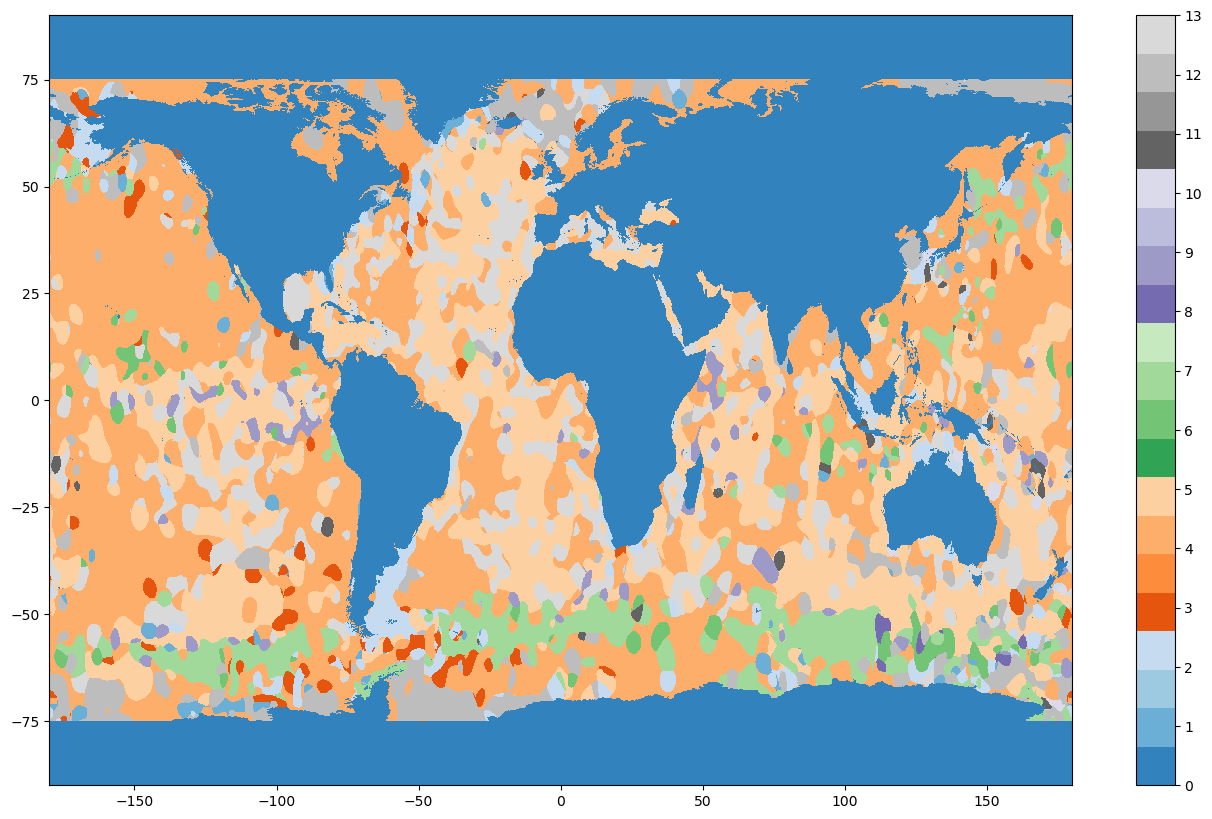

In [44]:
#Mapping of sediment types from data
plt.figure(figsize=(10*1.65,10))
plt.pcolormesh(lon,lat,z_no_nan,cmap='tab20c')
plt.colorbar(ticks=[0,1,2,3,4,5,6,7,8,9,10,11,12,13]) #ticks manually added due to known number of values.

Unfortunately, the files did not include a key for what types of sediment corresponded to each integer. As a result, the above map was cross-referenced with the online map on the GPlates website (https://portal.gplates.org/cesium/?view=seabed) to manually determine these. Below is a set of 2 dictionaries, one for precise sediment types and one for broad sediment types.

In [ ]:
lithology_key={0:'No Data',
               1:'Gravel and coarser',2:'Sand',3:'Silt',4:'Clay',
               5:'Calcareous Ooze',6:'Radiolarian Ooze',7:'Diatom Ooze',
               8:'Sponge Spicules',9:'Mixed Calcareous-Siliceous Ooze',
               10:'Shells and Coral Fragments',
               11:'Ash and Volcanic Sand/Gravel',
               12:'Fine-Grained Calcareous Sediment',13:'Siliceous Mud'}
lithology_type_key={'No Data':'No Data',
                    'Gravel and coarser':'Siliciclastic','Sand':'Siliciclastic','Silt':'Siliciclastic','Clay':'Siliciclastic',
                    'Calcareous Ooze':'Biogenic','Radiolarian Ooze':'Biogenic','Diatom Ooze':'Biogenic',
                    'Sponge Spicules':'Biogenic','Mixed Calcareous-Siliceous Ooze':'Biogenic',
                    'Shells and Coral Fragments':'Biogenic',
                    'Ash and Volcanic Sand/Gravel':'Volcaniclastic',
                    'Fine-Grained Calcareous Sediment':'Transitional','Siliceous Mud':'Transitional'}